Create a new file `12_Spark_SQL_BQ.py` which has some slight variations from `09_Spark_SQL.py` in terms of the config info:

When we created a dataproc cluster, it creates 2 temp buckets in GCS. We need to pass one of these buckets in the command to run the job

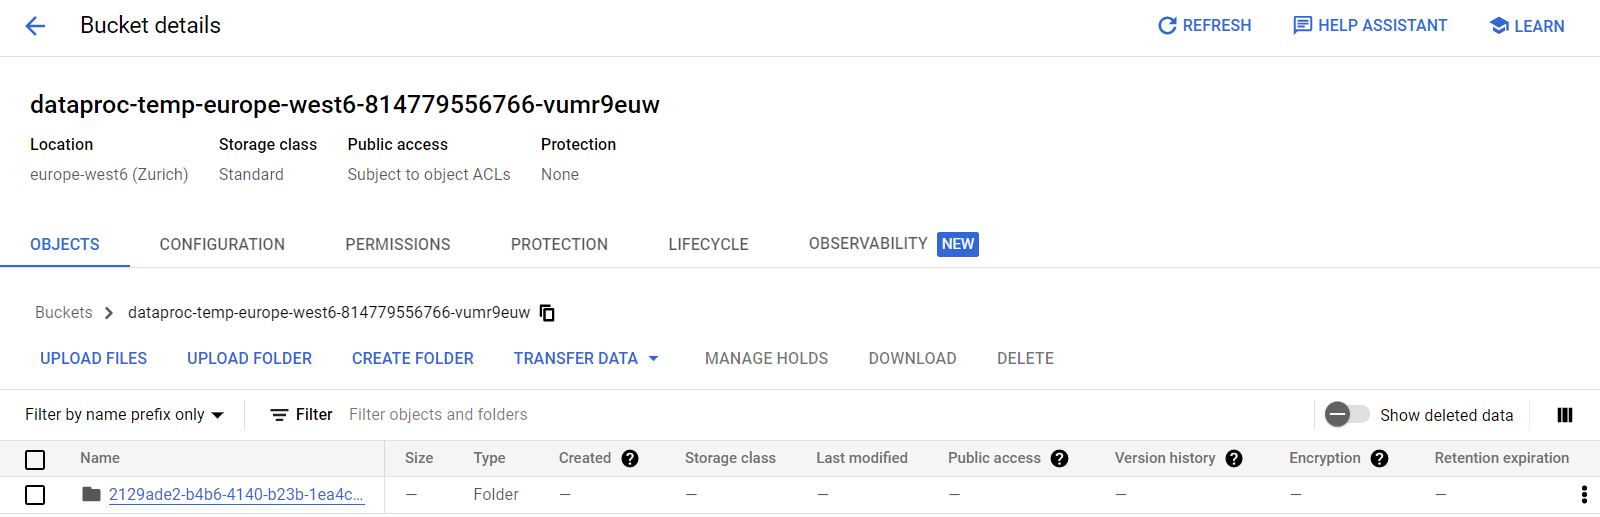

In [5]:
# Change the last line to this in '09_Spark_SQL.py'

# df_result.write.format('bigquery') \
#     .option('table', output) \
#     .save()

# Add this line in '09_Spark_SQL.py'

# spark.conf.set('temporaryGcsBucket', 'dataproc-temp-europe-west6-814779556766-vumr9euw')

As you can see, the `dataproc-temp-europe-west6-814779556766-vumr9euw` is the name of the temporary bucket that's present in GCS. We have passed this in the code `12_Spark_SQL_BQ.py`

Now move this code to GCS by using this command -

In [ ]:
# gsutil cp 12_Spark_SQL_BQ.py gs://dtc_data_lake_composed-sun-375018/code/12_Spark_SQL_BQ.py  (Update your bucket name accordingly)

Then run the below command from the terminal -

Here, for output, we are passing a schema that's present in BQ (`trips_data_all`)-

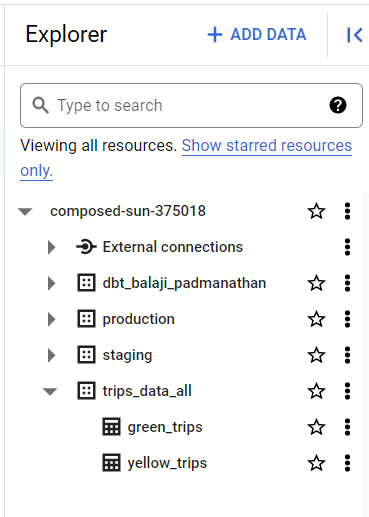

Even though `reports-2020` table currently doesnt exist in the schema, our job should create one for us

In [4]:
# C:/Users/balaj/GCloud/gcloud/bin/gcloud.cmd dataproc jobs submit pyspark \
#     --cluster=de-zoomcamp-cluster \
#     --region=europe-west6 \
#     --jars=gs://spark-lib/bigquery/spark-bigquery-with-dependencies_2.12-0.23.4.jar \
#     gs://dtc_data_lake_composed-sun-375018/code/12_Spark_SQL_BQ.py \
#     -- \
#         --input_green=gs://dtc_data_lake_composed-sun-375018/pq/green/2020/*/ \
#         --input_yellow=gs://dtc_data_lake_composed-sun-375018/pq/yellow/2020/*/ \
#         --output=trips_data_all.reports-2020